# Neural Networks
### Quick Definition
A neural network computes non-linear combinations $y$ for an input vector $x$ using multiple different "layers". <br>
Example NN with 3 layers: <br>$y = W_3 \ max(0, W_2 \ max(0, W_1\ x))$<br>
Here $W_1, \ W_2, \ W_3$ are "learnable" weight matrices for each layer.<br>
In this neural network, ReLU is used as the activation function:<br>
$ReLU(x) = \max(0, x)$

### Training a Neural Network in 1 Minute Using Libraries
There are multiple different libraries for creatign and using neural networks, such as tensorflow, pytorch, keras, etc. Such libraries have been in development and been optimised for use in nearly every single type of hardware. However I still decided to write one from scratch because I'm a noob and I want to learn.

### Neural network in Pytorch

#### Making Data

In [1]:
%matplotlib inline
import torch
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import torch.nn as nn
import matplotlib.pyplot as plt
from tqdm import trange

In [2]:
n_samples = 1000
test_size = 0.1

X, y = make_circles(n_samples, noise=0.04)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

# make data cute for torch
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train.reshape((-1, 1))).float()
y_test = torch.tensor(y_test.reshape((-1, 1))).float()

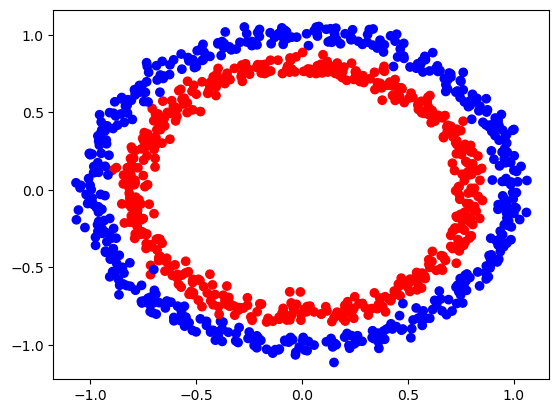

In [3]:
# plotting using y values -> 0:blue 1:red
plt.scatter(x=X[:, 0], y=X[:, 1], c=y[:], cmap=plt.cm.bwr)

| Activation Function | Problem Type | PyTorch Code |
| ------------------- | ------------ | ------------ |
| ReLU (Rectified Linear Unit) | General, widely used | torch.nn.ReLU |
| Sigmoid | Binary classification, output probabilities | torch.nn.Sigmoid |
| Tanh (Hyperbolic Tangent) | Between -1 and 1 outputs, often in hidden layers | torch.nn.Tanh |
| Softmax | Multi-class classification, output probabilities | torch.nn.Softmax |
| Leaky ReLU | General, addresses dying ReLU problem | torch.nn.LeakyReLU |
| ELU (Exponential Linear Unit) | General, similar to Leaky ReLU with smoother curve | torch.nn.ELU |
| SELU (Scaled Exponential Linear Unit) | Self-normalizing networks | torch.nn.SELU |
| GELU (Gaussian Error Linear Unit) | Often used in Transformer models | torch.nn.GELU |


In [4]:
# INITIATING THE NETWORK AND THE LAYERS

class NNet(nn.Module):
    def __init__(self):
        super(NNet, self).__init__()
        self.hidden_size = 10
        self.act = nn.ReLU()
        self.l1 = nn.Linear(2, self.hidden_size)
        self.l2 = nn.Linear(self.hidden_size, 1)
        self.sig = nn.Sigmoid()
    def forward(self, x):
        x = self.l1(x)
        x = self.act(x)
        x = self.l2(x)
        return self.sig(x)

model = NNet()

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | torch.optim.SGD() |
| Adam Optimizer | Classification, regression, many others. | torch.optim.Adam() |
| Binary cross entropy loss | Binary classification | torch.nn.BCELossWithLogits or torch.nn.BCELoss |
| Cross entropy loss | Mutli-class classification | torch.nn.CrossEntropyLoss |
| Mean absolute error (MAE) or L1 Loss | Regression | torch.nn.L1Loss | 
| Mean squared error (MSE) or L2 Loss | Regression | torch.nn.MSELoss |  

accuracy 0.97 loss 0.48: 100%|████████████| 1000/1000 [00:00<00:00, 1479.32it/s]


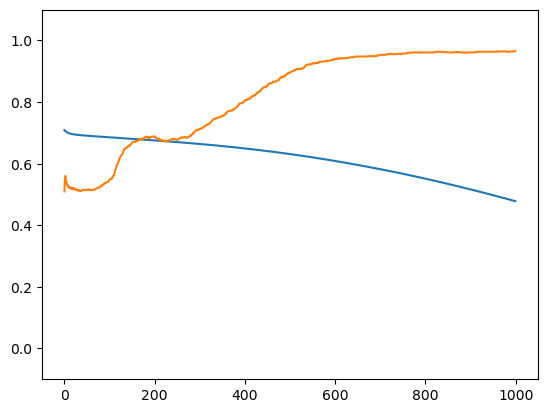

In [5]:
# TRAINING THE MODEL

from torch.optim import SGD

loss_function = nn.BCELoss()
optimizer = SGD(model.parameters(), lr=0.15)

accuracies, losses = [], []

for i in (t := trange(1000)):
    model.train()
    y_res = model(X_train)
    
    # results are between 0 and 1 because the last layer is sigmoid
    # we round it to get classifications
    accuracy = (y_res.round() == y_train).float().mean()
    loss = loss_function(y_res, y_train)

    # backward propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    accuracies.append(accuracy.item())
    losses.append(loss.item())
    t.set_description("accuracy %.2f loss %.2f" % (accuracy.item(), loss.item()))

plt.ylim(-0.1, 1.1)
plt.plot(losses)
plt.plot(accuracies)

In [6]:
# EVALUATING THE MODEL

model.eval()
y_res = model(X_test)
test_accuracy = (y_res.round() == y_test).float().mean()
loss = loss_function(y_res, y_test)

test_accuracy.item(), loss.item()

(0.9800000190734863, 0.48088976740837097)

## Single Neurons
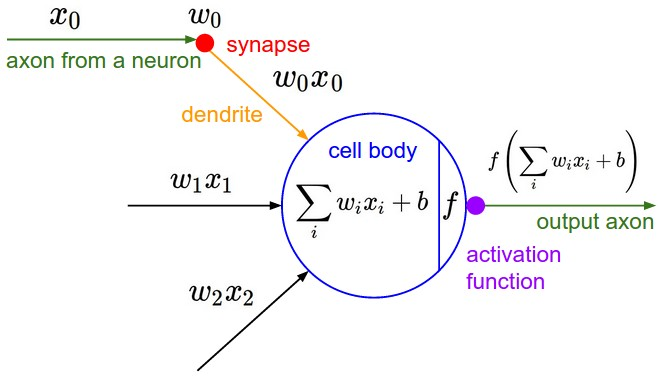

#### Example Neuron in Python

In [7]:
import numpy as np

def activation_function(x):
    return 1 / (1 + np.exp(-x)) # Sigmoid function in this example
    
class Neuron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
        
    def forward(self, inputs):
        sum = np.dot(self.weights, inputs) + self.bias
        return activation_function(sum)


#### Biological Neurons
As simillar as the mathematical model of neurons might seem to the biological neurons, the differences are immense.<br>
Some of the most important differences:<br>
- Biological dendrites perform complex non-linear computations on the inputs.
- Biological neurons "fire spikes" as a function of time and other external stimuli, and the activation function used in NN is not a percise model of the biological spikes.
  
<!---->

And numerous other differences which I currently don't know :)

## Single Layers
From now on, instead of using single neurons as the fundamental units in the network, we are going to use the layers as the fundamental units of the neural network. This is due to the fact that the neurons in the same layer do the exact same mathematical operations on their input, so we can leverage this to put all the inputs, weights and biases in matrices and use matrix operations to calculate the output for each layer.

#### Let's Define the Matrices
$n[l] = \#\ \text{of neurons in layer l}$<br>
$W^{(l)} = \text{matrix of weights connecting layers } (l-1) \text{ and } l, \text{ with dimensions } n[l-1] \times n[l]$<br>
$B^{(l)} = \text{vector of biases for layer } l, \text{ with dimensions } 1 \times n[l]$<br>
<br>
However, this might result in added complexity because biases can be added into the weights matrices themselves.  
By extending the weight matrix $W^{(l)}$ and the input vector, we can include the bias into the weight matrix. This simplifies the forward pass equation.

Extend the weight matrix and input vector as follows:<br>
$\tilde{W}^{(l)} = \begin{bmatrix} W^{(l)} \\ B^{(l)} \end{bmatrix}, \text{ with dimensions } (n[l-1]+1) \times n[l]$<br>
$\tilde{Res}^{l-1} = \begin{bmatrix} Res^{l-1} \\ 1 \end{bmatrix}, \text{ with dimensions } (n[l-1]+1) \times 1$<br>
<br>
Now, the forward pass equation becomes:<br>
$Res^{l} = \tilde{Res}^{l - 1} \tilde{W}^{l}$<br>
<br>
This approach simplifies the forward pass equation even more.

#### Loss Function
In this example we are using Binary Cross Entropy loss. For this loss function the last layer should be a sigmoid activation function so that the output is between 0 and 1. This loss function is defined as below:  
$ CrossEntropy(y, \  {\hat {y}}) = -{\frac {1}{N}}\sum _{n=1}^{N}\ {\bigg [}y_{n}\log {\hat {y}}_{n}+(1-y_{n})\log(1-{\hat {y}}_{n}){\bigg ]}$  
Where $N$ is the number of objects, $\hat {y}$ are the predicted probabilities for each class and $y$ are the classifications. 
This definition can also be extended to more than 2 classes.

#### Backpropagation

Backpropagation is a method used in artificial neural networks to calculate the gradient of the loss function with respect to all weights. The goal is to update the weights in the network in a way that minimizes the loss function.

Let's define:

- $W^{l}$: Matrix of weights in layer $l$.
- $Res^{l}$: Matrix of activation values in layer $l$.
- $WeightGradients^{l}$: Gradient matrix of weights for layer $l$.
- $ResGradients^{l}$: Gradient matrix of activation values for layer $l$.
  
Recall from forward pass:  

   $$
   Res^{l} = Res^{l-1} W^{l}
   $$
Assuming we already have the matrices for layer $l$, we can calculate the matrices for layer $l-1$:

1. **Calculating Weight Gradients**:<br><br>
   The gradient of the loss function with respect to the weights is calculated by:
   $$
   WeightGradients^{l} = (Res^{l - 1})^\top ResGradients^{l}
   $$
   To see how this generates correct gradients, it should be helpful to take a look at a single value in this matrix:  
   $$
     \frac{\partial \text{loss}}{\partial W[l][i][j]} = \frac{\partial \text{loss}}{\partial Res[l][1][j]} \times \frac{\partial Res[l][1][j]}{\partial W[l][i][j]}
   $$
   This equation applies the chain rule. Then we replace the derivatives with their correct values to see the final equation:  
   $$
     \frac{\partial \text{loss}}{\partial W[l][i][j]} = \frac{\partial \text{loss}}{\partial Res[l][1][j]} \times Res[l - 1][1][i]
   $$

2. **Calculating Activation Gradients**:<br><br>
   The gradient of the loss function with respect to the activations is:
   $$
   ResGradients^{l - 1} = ResGradients^{l} (W^{l})^\top
   $$
   Again, let's analyze each entry in $ResGradients$:  
   $$
     \frac{\partial \text{loss}}{\partial Res[l - 1][1][i]} = \sum_{j=1}^{n[l]} \left( W[l][i][j] \times \frac{\partial \text{loss}}{\partial Res[l][1][j]} \right)
    $$
<br>
So we start from the last layer and calculate gradients for every parameter in the model.
